In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('music_genre.csv', skipinitialspace=True)
df = df.dropna()
tempoindex = df[df.tempo == '?'].index
df.drop(tempoindex, inplace=True)
df.drop(df.loc[df['duration_ms'] == -1.0].index, inplace=True)
df.drop_duplicates(['instance_id','track_name'], inplace=True)
mdf = df.drop(['key','mode','obtained_date'],axis=1)
mdf.to_csv('music_dataset.csv')
reg_dataset = pd.read_csv('music_dataset.csv', index_col=[0])
reg_dataset.head(7)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,0.1240,-7.043,0.0300,115.002,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,0.5340,-4.617,0.0345,127.994,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,0.1570,-4.498,0.2390,128.014,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,0.1570,-6.266,0.0413,145.036,0.323,Electronic
6,43760.0,Jordan Comolli,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,0.1060,-4.294,0.3510,149.995,0.230,Electronic
7,30738.0,Hraach,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,0.0635,-9.339,0.0484,120.008,0.761,Electronic
8,84950.0,Kayzo,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,0.1780,-3.175,0.2680,149.948,0.273,Electronic


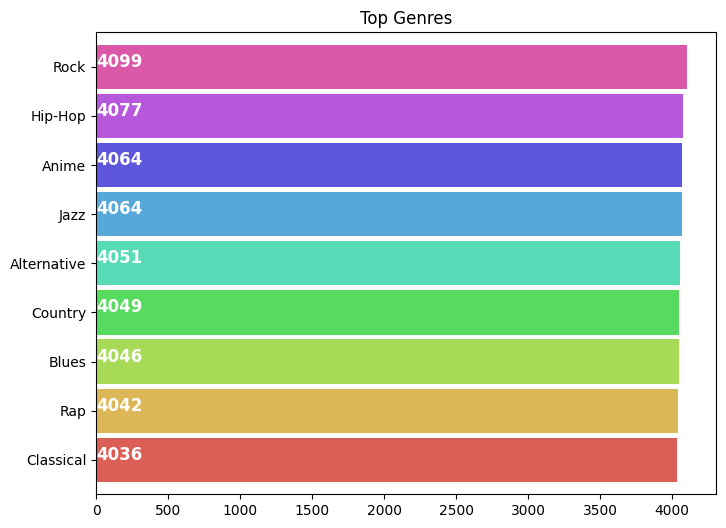

In [ ]:
mdf['music_genre'] = mdf['music_genre'].str.strip('[]').str.replace(' ','').str.replace("'",'')
mdf['music_genre'] = mdf['music_genre'].str.split(',')

plt.subplots(figsize=(8,6))
list1 = []
for i in mdf['music_genre']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:9].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',9))
for i, v in enumerate(pd.Series(list1).value_counts()[:9].sort_values(ascending=True).values):
    ax.text(.6, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()


In [ ]:
new_df = reg_dataset.drop(['artist_name','instance_id'],axis=1)
new_df.to_csv('new_music_dataset.csv')
ndf = pd.read_csv('new_music_dataset.csv', index_col=[0])
ndf.head(7)

,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
1,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,0.1240,-7.043,0.0300,115.002,0.531,Electronic
2,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,0.5340,-4.617,0.0345,127.994,0.333,Electronic
3,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,0.1570,-4.498,0.2390,128.014,0.270,Electronic
4,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,0.1570,-6.266,0.0413,145.036,0.323,Electronic
6,Clash,46.0,0.02890,0.572,214408.0,0.803,0.000008,0.1060,-4.294,0.3510,149.995,0.230,Electronic
7,Delirio,43.0,0.02970,0.809,416132.0,0.706,0.903000,0.0635,-9.339,0.0484,120.008,0.761,Electronic
8,NEVER ALONE,39.0,0.00299,0.509,292800.0,0.921,0.000276,0.1780,-3.175,0.2680,149.948,0.273,Electronic


In [ ]:
new_ndf = ndf.drop('track_name',axis="columns")
new_ndf.to_csv('ndf_music_dataset.csv')
num_dataset = pd.read_csv('ndf_music_dataset.csv', index_col=[0])
num_dataset.head(7)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,music_genre
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,0.1240,-7.043,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,0.5340,-4.617,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,0.1570,-4.498,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,0.1570,-6.266,0.0413,145.036,0.323,Electronic
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,0.1060,-4.294,0.3510,149.995,0.230,Electronic
7,43.0,0.02970,0.809,416132.0,0.706,0.903000,0.0635,-9.339,0.0484,120.008,0.761,Electronic
8,39.0,0.00299,0.509,292800.0,0.921,0.000276,0.1780,-3.175,0.2680,149.948,0.273,Electronic


In [ ]:
df_uniques = pd.DataFrame([[i, len(num_dataset[i].unique())] for i in num_dataset.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
categorical_variables = list(df_uniques[(10 == df_uniques['Unique Values'])].index)
categorical_variables = list(set(categorical_variables))
numeric_variables = list(set(num_dataset.columns) - set(categorical_variables))

print(categorical_variables, ' and ' , numeric_variables)

lb, le = LabelBinarizer(), LabelEncoder()

num_dataset = pd.get_dummies(num_dataset, columns = categorical_variables, drop_first=True) ## to avoid multi-collinearity

df_join = pd.concat([num_dataset, ndf], axis=1)
df_join = df_join.loc[:,~df_join.T.duplicated(keep='first')]
final_df = df_join.drop('music_genre',axis="columns")
final_df.to_csv('final_music_dataset.csv')
final_df = pd.read_csv('final_music_dataset.csv', index_col=[0])
final_df.head(7)

['music_genre']  and  ['speechiness', 'valence', 'tempo', 'popularity', 'loudness', 'danceability', 'instrumentalness', 'duration_ms', 'liveness', 'energy', 'acousticness']


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock,track_name
1,31.0,0.01270,0.622,218293.0,0.890,0.950000,0.1240,-7.043,0.0300,115.002,...,False,False,False,False,True,False,False,False,False,The Shining Path
2,28.0,0.00306,0.620,215613.0,0.755,0.011800,0.5340,-4.617,0.0345,127.994,...,False,False,False,False,True,False,False,False,False,Hurricane
3,34.0,0.02540,0.774,166875.0,0.700,0.002530,0.1570,-4.498,0.2390,128.014,...,False,False,False,False,True,False,False,False,False,Nitro
4,32.0,0.00465,0.638,222369.0,0.587,0.909000,0.1570,-6.266,0.0413,145.036,...,False,False,False,False,True,False,False,False,False,Divide & Conquer
6,46.0,0.02890,0.572,214408.0,0.803,0.000008,0.1060,-4.294,0.3510,149.995,...,False,False,False,False,True,False,False,False,False,Clash
7,43.0,0.02970,0.809,416132.0,0.706,0.903000,0.0635,-9.339,0.0484,120.008,...,False,False,False,False,True,False,False,False,False,Delirio
8,39.0,0.00299,0.509,292800.0,0.921,0.000276,0.1780,-3.175,0.2680,149.948,...,False,False,False,False,True,False,False,False,False,NEVER ALONE


In [ ]:
mm = MinMaxScaler()
for column in [numeric_variables]:
    num_dataset[column] = mm.fit_transform(num_dataset[column])

In [ ]:
# Set up X and y variables (must be binary values)
y, X = num_dataset['music_genre_Rock'], num_dataset.drop(columns='music_genre_Rock')

# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=17)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

       False       0.98      0.96      0.97     14575
        True       0.71      0.80      0.76      1649

    accuracy                           0.95     16224
   macro avg       0.85      0.88      0.86     16224
weighted avg       0.95      0.95      0.95     16224

Accuracy score:  0.95
F1 Score:  0.76


In [ ]:
max_k = 33
f1_scores = list()
error_rates = list() # 1-accuracy

# keep initialiting the KNN and look at the F1 score and look at the one that maximises it
for k in range(1, max_k):

    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

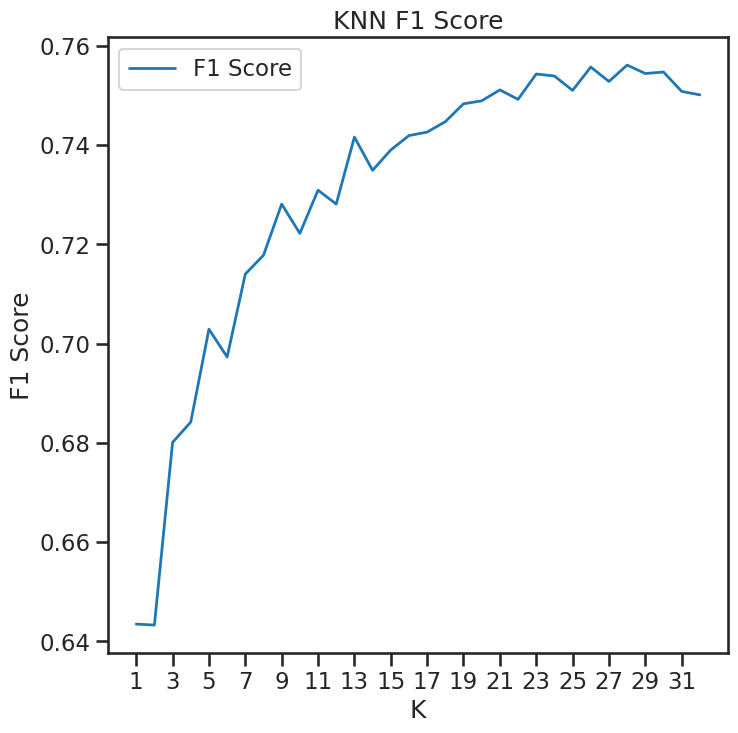

In [ ]:
    error_rates.append((k, error))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(8, 8), linewidth=2)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.show()

In [ ]:
def get_song(song_name):
    song_name = final_df[final_df['track_name']==song_name]
    return song_name

In [ ]:
def recommend_song(song_name):
    song = get_song(song_name)
    song_drop = song.drop('track_name', axis=1)
    song_name = pd.DataFrame(data=song_drop, index=None)
    feature_cols = final_df.drop('track_name', axis=1)
    new_X = feature_cols
    neigh = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
    neigh.fit(new_X)
    distances, indices = neigh.kneighbors(song_name)
    for i in range(len(distances.flatten())):
        return final_df['track_name'].iloc[indices[i]+1].values